In [1]:
from models.utils.detect_hair import image_to_mask
from PIL import Image, ImageColor
from matplotlib import pyplot as plt

import cv2
import numpy as np

In [2]:
def PIL_to_cv2(pil_image):
    return cv2.cvtColor(np.array(pil_image, dtype=np.float32), cv2.COLOR_RGB2BGR)

def cv2_to_PIL(cv2_image):
    return Image.fromarray(cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB))

In [3]:
color_codes = {'pink' : '#ff007f', 'blue' : '#0000ff', 'green' : '#008000', 'yellow' : '#ffff00', 'red' : '#ff0000', 'orange' : '#ffa500', 'purple' : '#800080', 'black' : '#000000', 'white' : '#ffffff'}

In [4]:
def hair_tryon(image_path, color_code, weight = 0.4):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))

    mask = image_to_mask(image=cv2_to_PIL(image))
    mask = PIL_to_cv2(mask)

    _, mask = cv2.threshold(mask, thresh=180, maxval=255, type=cv2.THRESH_BINARY)

    colored_mask = np.copy(image)

    R, G, B = ImageColor.getcolor(color_codes[color_code], "RGB")
    new_color = (B, G, R)

    colored_mask[(mask==255).all(-1)] = new_color

    colored_mask_w = cv2.addWeighted(colored_mask, weight, image, 1 -weight, 0, colored_mask)

    fig, ax = plt.subplots(1,3,figsize=(8,4))
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Input')
    ax[0].axis('off')

    ax[1].imshow(np.clip(mask, 0, 255).astype(np.uint8))
    ax[1].set_title('Mask (UNet)')
    ax[1].axis('off')

    ax[2].imshow(cv2.cvtColor(colored_mask_w, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Output')
    ax[2].axis('off')

    plt.tight_layout()
    
    plt.savefig(f'output/{color_code}.png', bbox_inches='tight')

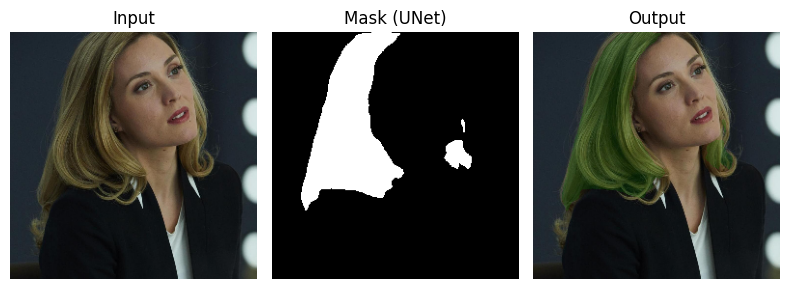

In [5]:
hair_tryon('images/003.jpg', 'green', 0.2)

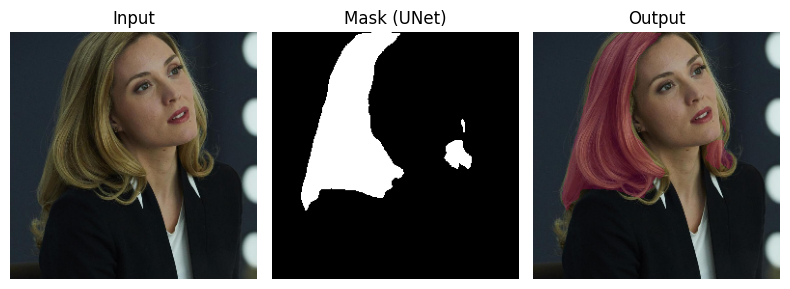

In [6]:
hair_tryon('images/003.jpg', 'pink', 0.2)